In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Entropy function
def h(p):
    if p == 0 or p == 1: return 0
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

ITERS = 100
# Inverse entropy h^{-1}(y)
def invh(y):
    left = 0
    right = 0.5
    for i in range(ITERS):
        mid = 0.5*(left+right)
        if h(mid) > y: right = mid
        else: left = mid
    return mid

In [3]:
# Mrs Gerber function: m(alpha, y) = h( alpha * h^-1(y) )
def m(alpha, y):
    if y < 0: raise Exception('Mrs gerber negative value')
    q = invh(y)
    qprim = q*(1-alpha)+alpha*(1-q)
    return h(qprim)

In [4]:
# Returns I(X;E)-I(X;Y) for scalar X~Ber(r), Y=BSC_p(X), E=BEC_q(X)
def I_diff(q, p, r):
    conv = (1-p)*r + p*(1-r)
    return (1-q)*h(r) - h(conv) + h(p)

In [5]:
## compute Eta for a given alpha and q
def ternary_search(alpha,q,left, right, absolute_precision):
    while abs(right - left) >= absolute_precision:
        left_third = left + (right - left)/3
        right_third = right - (right - left)/3

        if I_diff(q,alpha,left_third) < I_diff(q,alpha,right_third):
            left = left_third
        else:
            right = right_third
            
    return I_diff(q,alpha,(left + right)/2)
def get_eta_more_capable(alpha, q):
    return ternary_search(alpha,q,0, 1,1e-11) 

In [6]:
### compute the espectation of h(q^{*G}) for G~Geom(1-gamma)
def estimate_h_gamma(q, gamma, tolerance):
    g = 1
    total_mass = 0
    res = 0
    while total_mass < 1-tolerance:
        p_g = (1-gamma) * gamma**(g-1)
        res += p_g * h( 0.5*(1-(1-2*q)**g) )
        total_mass += p_g
        g += 1
    return res

In [7]:
#### Our lower bound for any gamma(not the max)
def Lower_bound(alpha,q,GAMMA):
    H_gamma = estimate_h_gamma(q, GAMMA, 1e-11)
    eta=get_eta_more_capable(alpha,GAMMA)
    return (1-GAMMA)*H_gamma+h(alpha)-eta

In [8]:
### getting the best gamma
def ternary_search2(alpha,q,left, right, absolute_precision):
    while abs(right - left) >= absolute_precision:
        left_third = left + (right - left)/3
        right_third = right - (right - left)/3

        if Lower_bound(alpha,q,left_third) < Lower_bound(alpha,q,right_third):
            left = left_third
        else:
            right = right_third
            
    return (left + right)/2
def gamma_max(alpha, q):
    return ternary_search2(alpha,q,0, 1,1e-11)

In [9]:
## Our Lower bound (i.e with the best gamma)
def New_Lower_bound(alpha,q):
    GAMMA=gamma_max(alpha,q)
    H_gamma = estimate_h_gamma(q, GAMMA, 1e-11)
    eta=get_eta_more_capable(alpha,GAMMA)
    res=(1-GAMMA)*H_gamma+h(alpha)-eta
#     print("Lower bound in Theorem 1.4=", res)
    return res

In [10]:
## Lower bound from Ordentlich
def Ord_Lower_bound(alpha,q):
    GAMMA = 1 - (1-2*alpha)**2
    H_gamma = estimate_h_gamma(q, GAMMA, 1e-11)
    res=m(alpha, H_gamma)
#     print("Lower bound from Ordentlich=",res)
    return res

In [11]:
for alpha in np.linspace(0,0.5,50)[1:-1]:
    for q in np.linspace(0,0.5,50)[1:-1]:
        NLB=New_Lower_bound(alpha,q)
        OLB=Ord_Lower_bound(alpha,q)
        if NLB<OLB:
            print("Not Ok with alpha=%.3lf and q=%.3lf" % (alpha,q))
            print("Lower bound in Theorem 1.4=", NLB)
            print("Lower bound from Ordentlich=", OLB)
            print("\n")
    print("okay with alpha=",alpha)

okay with alpha= 0.01020408163265306
okay with alpha= 0.02040816326530612
okay with alpha= 0.030612244897959183
okay with alpha= 0.04081632653061224
okay with alpha= 0.0510204081632653
okay with alpha= 0.061224489795918366
okay with alpha= 0.07142857142857142
okay with alpha= 0.08163265306122448
okay with alpha= 0.09183673469387754
okay with alpha= 0.1020408163265306
okay with alpha= 0.11224489795918366
okay with alpha= 0.12244897959183673
okay with alpha= 0.13265306122448978
okay with alpha= 0.14285714285714285
okay with alpha= 0.1530612244897959
okay with alpha= 0.16326530612244897
okay with alpha= 0.17346938775510204
okay with alpha= 0.18367346938775508
okay with alpha= 0.19387755102040816
okay with alpha= 0.2040816326530612
okay with alpha= 0.21428571428571427
okay with alpha= 0.22448979591836732
okay with alpha= 0.2346938775510204
okay with alpha= 0.24489795918367346
okay with alpha= 0.25510204081632654
okay with alpha= 0.26530612244897955
okay with alpha= 0.2755102040816326
okay 

In [12]:
np.linspace(0,0.5,50)[1:-1]

array([0.01020408, 0.02040816, 0.03061224, 0.04081633, 0.05102041,
       0.06122449, 0.07142857, 0.08163265, 0.09183673, 0.10204082,
       0.1122449 , 0.12244898, 0.13265306, 0.14285714, 0.15306122,
       0.16326531, 0.17346939, 0.18367347, 0.19387755, 0.20408163,
       0.21428571, 0.2244898 , 0.23469388, 0.24489796, 0.25510204,
       0.26530612, 0.2755102 , 0.28571429, 0.29591837, 0.30612245,
       0.31632653, 0.32653061, 0.33673469, 0.34693878, 0.35714286,
       0.36734694, 0.37755102, 0.3877551 , 0.39795918, 0.40816327,
       0.41836735, 0.42857143, 0.43877551, 0.44897959, 0.45918367,
       0.46938776, 0.47959184, 0.48979592])

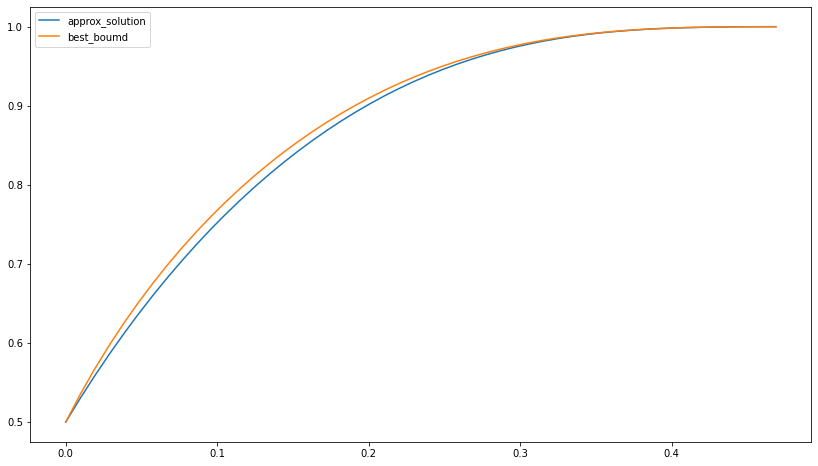

In [13]:
#### Bound from Ordentlich (approx_...) vs our bound (best_...) for q=0.11 and alpha varying
Q=0.11
Approx_solution1=[]
Best_bound1=[]
alpha=np.linspace(2**(-100),0.5-2**(-5),50)
for ALPHA in alpha:
    GAMMA = 1 - (1-2*ALPHA)**2
    H_gamma = estimate_h_gamma(Q, GAMMA, 1e-8)
#     print('H_gamma = %lf' % H_gamma)
    approx_solution = m(ALPHA, H_gamma)
    Approx_solution1.append(approx_solution)

    gamma=gamma_max(ALPHA,Q)
    eta = get_eta_more_capable(ALPHA, gamma)
    H_gamma = estimate_h_gamma(Q, gamma, 1e-8)
    best_bound=(1-gamma)*H_gamma + h(ALPHA) - eta
    Best_bound1.append(best_bound)
plt.figure(figsize=(14,8))
plt.plot(alpha,Approx_solution1, label="approx_solution")
plt.plot(alpha,Best_bound1, label="best_boumd")
# plt.plot(alpha,MGL,label="MGL")
plt.legend();

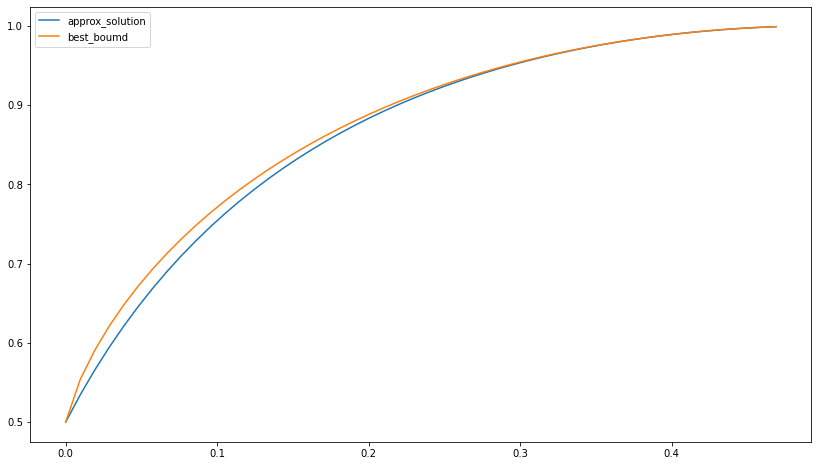

In [14]:
#### Bound from Ordentlich (approx_...) vs our bound (best_...) for alpha=0.11 and q varying
ALPHA=0.11
Approx_solution2=[]
Best_bound2=[]
Qlist=np.linspace(2**(-20),0.5-2**(-5),50)
for Q in Qlist:
    GAMMA = 1 - (1-2*ALPHA)**2
#     print('gamma = %lf' % GAMMA)
    H_gamma = estimate_h_gamma(Q, GAMMA, 1e-10)
#     print('H_gamma', H_gamma)
#     print('H_gamma = %lf' % H_gamma)
    approx_solution = m(ALPHA, H_gamma)
    Approx_solution2.append(approx_solution)
    GAMMA=gamma_max(ALPHA,Q)
    H_gamma = estimate_h_gamma(Q, GAMMA, 1e-10)
    eta = get_eta_more_capable(ALPHA, GAMMA)
    best_bound =(1-GAMMA)*H_gamma + h(ALPHA) - eta
    Best_bound2.append(best_bound)
plt.figure(figsize=(14,8))
plt.plot(Qlist,Approx_solution2,label="approx_solution")
plt.plot(Qlist,Best_bound2, label="best_boumd")
plt.legend();

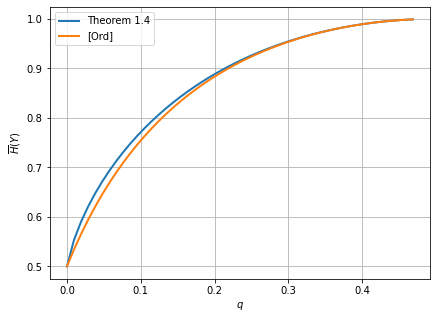

In [22]:
## with lengend
plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.plot(alpha,Best_bound1, label="Theorem 1.4",linewidth=2)
# plt.plot(alpha,Approx_solution1,label="[Ord]",linewidth=2)
# plt.xlabel(r"$\alpha$")
# plt.ylabel(r"$\overline{H}(Y)$")
# plt.grid()
# plt.legend();
plt.subplot(1,2,2)
plt.plot(Qlist,Best_bound2, label="Theorem 1.4",linewidth=2)
plt.plot(Qlist,Approx_solution2, label="[Ord]",linewidth=2)
plt.xlabel(r"$q$")
plt.ylabel(r"$\overline{H}(Y)$")
plt.grid()
plt.legend();

In [16]:
# #### plots with many q 
# plt.figure(figsize=(20,15))
# L=[0.01,0.06,0.11,0.22,0.30,0.40,0.45,0.499]
# for i in range(1,9):
#     Q=L[i-1]
#     Approx_solution1=[]
#     Best_bound1=[]
#     alpha=np.linspace(2**(-20),0.5-2**(-5),50)
#     for ALPHA in alpha:
#         GAMMA = 1 - (1-2*ALPHA)**2
#     #     print('gamma = %lf' % GAMMA)
#         H_gamma = estimate_h_gamma(Q, GAMMA, 1e-8)
#     #     print('H_gamma = %lf' % H_gamma)
#         approx_solution = m(ALPHA, H_gamma)
# #         MGL.append(h((1-ALPHA)*Q + ALPHA*(1-Q)))
#         Approx_solution1.append(approx_solution)
#         gamma=gamma_max(ALPHA,Q)
#         eta = get_eta_more_capable(ALPHA, gamma)
#         H_gamma = estimate_h_gamma(Q, gamma, 1e-8)
#         best_bound=(1-gamma)*H_gamma + h(ALPHA) - eta
#         Best_bound1.append(best_bound) 
#     plt.subplot(2,4,i)
#     plt.plot(alpha,Approx_solution1,"--", label="approx_solution Q="+str(Q))
#     plt.plot(alpha,Best_bound1,label="best_boumd Q="+str(Q))
#     plt.legend();

In [17]:
# # plots with many alpha
# plt.figure(figsize=(25,15))
# L=[0.01,0.06,0.11,0.22,0.30,0.40,0.45,0.46]
# for i in range(1,9):
#     ALPHA=L[i-1]
#     Approx_solution2=[]
#     Best_bound2=[]
#     Qlist=np.linspace(2**(-20),0.5,50)
#     for Q in Qlist:
#         GAMMA = 1 - (1-2*ALPHA)**2
#     #     print('gamma = %lf' % GAMMA)
#         H_gamma = estimate_h_gamma(Q, GAMMA, 1e-10)
#     #     print('H_gamma = %lf' % H_gamma)
#         approx_solution = m(ALPHA, H_gamma)
#         Approx_solution2.append(approx_solution)
#         GAMMA=gamma_max(ALPHA,Q)
#         H_gamma = estimate_h_gamma(Q, GAMMA, 1e-10)
#         eta = get_eta_more_capable(ALPHA, GAMMA)
#         best_bound =(1-GAMMA)*H_gamma + h(ALPHA) - eta
#         Best_bound2.append(best_bound)
#     plt.subplot(2,4,i)
#     plt.plot(Qlist,Approx_solution2,"--",label="approx_solution $a\alpha$="+str(ALPHA))
#     plt.plot(Qlist,Best_bound2, label="best_boumd $a\alpha$="+str(ALPHA))
#     plt.legend();

In [18]:
# #### best gamma as a funtion of q for alpha=0.11
# ALPHA=0.11
# Best_gamma2=[]
# T=[]
# Qlist=np.linspace(2**(-30),0.5-2**(-5),300)
# for Q in Qlist:
#     best_gamma=gamma_max(ALPHA,Q)
#     T.append(4*ALPHA*(1-ALPHA))
#     Best_gamma2.append(best_gamma)
# plt.figure(figsize=(14,8))
# plt.plot(Qlist,T, label="gamma from Ordentlich for alpha="+str(ALPHA))
# plt.plot(Qlist,Best_gamma2, label="Best gamma for alpha="+str(ALPHA))
# plt.xlabel("$q$")
# plt.legend();

In [19]:
# #### best gamma as a funtion of alpha for q=0.11
# plt.figure(figsize=(15,8))
# Q=0.11
# alpha=np.linspace(0,0.5-2**(-5),300)
# Best_gamma1=[]
# for ALPHA in alpha:
#     best_gamma=gamma_max(ALPHA,Q)        
#     Best_gamma1.append(best_gamma)  
# plt.plot(alpha,4*alpha*(1-alpha), label=r"$\gamma=$"+r"4$\alpha(1-\alpha)$ from Ordentlich for Q=0.11",linewidth=2)
# plt.plot(alpha,Best_gamma1, label=r"$\gamma$=argmax of RHS of Theorem 1.4  for Q=0.11",linewidth=2)
# plt.xlabel(r"$\alpha$")
# plt.grid()
# plt.legend();

In [20]:
# ## with lengend
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.plot(Qlist,Best_gamma2, label="Theorem 1.4",linewidth=2)
# plt.plot(Qlist,T,label="[Ord]",linewidth=2)
# plt.xlabel(r"$q$")
# plt.ylabel(r"$\gamma$")
# plt.grid()
# plt.legend();
# # plt.subplot(1,2,2)
# # plt.plot(alpha,Best_gamma1, label="Theorem 1.4",linewidth=2)
# # plt.plot(alpha,4*alpha*(1-alpha), label="[Ord]",linewidth=2)
# # plt.xlabel(r"$\alpha$")
# # plt.ylabel(r"$\gamma$")
# # plt.grid()
# # plt.legend();

Encoding: $y_0, y_1, \ldots, y_{n-2}, x_{n-1} \to x_{n-1} + 2 y_{n-2} + \ldots + 2^{n-1} y_{0}$.

In [23]:
# Returns Y_table[k] = Pr[ y_0 ... y_{N-2}, x_{N-1} ] 
def compute_Y_table(q, alpha, N):
    res = np.zeros(2**N)
    res[0] = res[1] = 0.5
    for n in range(2, N+1):
        for kk in range(2**(n-1)-2, -1, -2):
            L = res[kk], res[kk+1]
            res[2*kk] = res[2*kk+1] = res[2*kk+2] = res[2*kk+3] = 0
            for k, p in zip( (kk, kk+1), L ):
                b = k%2
                res[2*k+b] += p*(1-alpha)*(1-q)
                res[2*k+(b^1)] += p*(1-alpha)*q
                res[2*(k^1)+b] += p*alpha*(1-q)
                res[2*(k^1)+(b^1)] += p*alpha*q
    return res

In [24]:
def compute_Y_table_step(q, alpha, N, old_Y):
    res = np.zeros(2**N)
    for k in range(2**(N-1)):
        p = old_Y[k]
        b = k%2
        res[2*k+b] += p*(1-alpha)*(1-q)
        res[2*k+(b^1)] += p*(1-alpha)*q
        res[2*(k^1)+b] += p*alpha*(1-q)
        res[2*(k^1)+(b^1)] += p*alpha*q
    return res

In [25]:
def compute_upper_bound(q, alpha, maxN):
    oldY = [0.5, 0.5]
    for n in range(2, maxN+1):
        res = 0
        newY = compute_Y_table_step(q, alpha, n, oldY)
        for k in range(0, 2**n, 2):
            py = newY[k]+newY[k+1]
            p0 = newY[k]*(1-alpha) + newY[k+1]*alpha
            p1 = newY[k]*alpha + newY[k+1]*(1-alpha)
            res += py * h(p0 / (p0+p1))
        oldY = newY
        if n == maxN: return res
        #print('n = %d res = %lf' % (n, res))

In [26]:
def compute_lower_bound(q, alpha, maxN):
    oldY = [0.5*(1-q), 0.5*q, 0.5*q, 0.5*(1-q)]
    for n in range(3, maxN+1):
        res = 0
        newY = compute_Y_table_step(q, alpha, n, oldY)
        for k in range(0, 2**n, 2):
            py = newY[k]+newY[k+1]
            p0 = newY[k]*(1-alpha) + newY[k+1]*alpha
            p1 = newY[k]*alpha + newY[k+1]*(1-alpha)
            res += py * h(p0 / (p0+p1))
        oldY = newY
        if n == maxN: return res
#        print('n = %d res = %lf' % (n, res))

In [27]:
compute_upper_bound(0.11, 0.49, 15),compute_lower_bound(0.11, 0.49, 15), New_Lower_bound(0.49,0.11), Ord_Lower_bound(0.49,0.11)

(0.9999998210782622,
 0.9999995491607162,
 0.9999998062900795,
 0.9999998062251068)

In [28]:
Q = 0.11
ALPHA = np.linspace(0, 0.5, 50)
UP, LOW = [], []
for alpha in ALPHA:
    print('alpha=%lf'%alpha)
    UP.append(compute_upper_bound(Q, alpha, 20))
    LOW.append(compute_lower_bound(Q, alpha, 20))

alpha=0.000000
alpha=0.010204
alpha=0.020408
alpha=0.030612
alpha=0.040816
alpha=0.051020
alpha=0.061224
alpha=0.071429
alpha=0.081633
alpha=0.091837
alpha=0.102041
alpha=0.112245
alpha=0.122449
alpha=0.132653
alpha=0.142857
alpha=0.153061
alpha=0.163265
alpha=0.173469
alpha=0.183673
alpha=0.193878
alpha=0.204082
alpha=0.214286
alpha=0.224490
alpha=0.234694
alpha=0.244898
alpha=0.255102
alpha=0.265306
alpha=0.275510
alpha=0.285714
alpha=0.295918
alpha=0.306122
alpha=0.316327
alpha=0.326531
alpha=0.336735
alpha=0.346939
alpha=0.357143
alpha=0.367347
alpha=0.377551
alpha=0.387755
alpha=0.397959
alpha=0.408163
alpha=0.418367
alpha=0.428571
alpha=0.438776
alpha=0.448980
alpha=0.459184
alpha=0.469388
alpha=0.479592
alpha=0.489796
alpha=0.500000


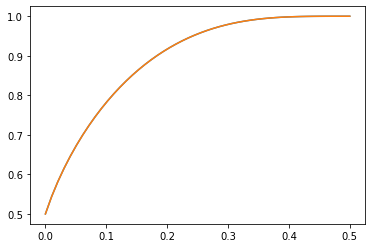

In [35]:
ALPHA = np.linspace(0, 0.5, 50)
plt.plot(ALPHA, UP)
plt.plot(ALPHA, LOW)

In [30]:
ALPHA = 0.11
Q = np.linspace(0, 0.5, 50)
UPq, LOWq = [], []
for q in Q:
    print('q=%lf'%q)
    UPq.append(compute_upper_bound(q, ALPHA, 20))
    LOWq.append(compute_lower_bound(q, ALPHA, 20))

q=0.000000
q=0.010204
q=0.020408
q=0.030612
q=0.040816
q=0.051020
q=0.061224
q=0.071429
q=0.081633
q=0.091837
q=0.102041
q=0.112245
q=0.122449
q=0.132653
q=0.142857
q=0.153061
q=0.163265
q=0.173469
q=0.183673
q=0.193878
q=0.204082
q=0.214286
q=0.224490
q=0.234694
q=0.244898
q=0.255102
q=0.265306
q=0.275510
q=0.285714
q=0.295918
q=0.306122
q=0.316327
q=0.326531
q=0.336735
q=0.346939
q=0.357143
q=0.367347
q=0.377551
q=0.387755
q=0.397959
q=0.408163
q=0.418367
q=0.428571
q=0.438776
q=0.448980
q=0.459184
q=0.469388
q=0.479592
q=0.489796
q=0.500000


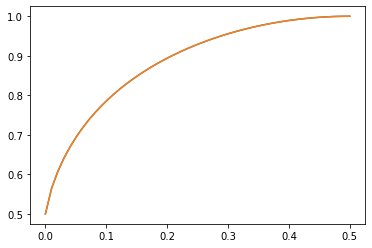

In [33]:
plt.plot(Q, UPq)
plt.plot(Q, LOWq)

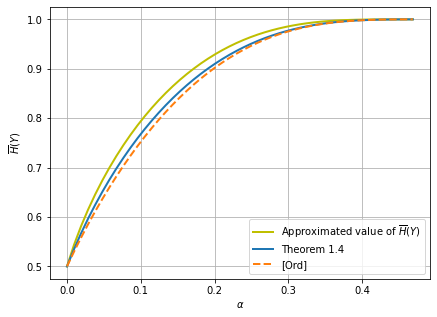

In [38]:
## with lengend
ALPHA = np.linspace(2**(-20), 0.5-2**(-5), 50)
Q = np.linspace(2**(-20), 0.5-2**(-5), 50)
alpha=np.linspace(2**(-20),0.5-2**(-5),50)
Qlist=np.linspace(2**(-20),0.5-2**(-5),50)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(ALPHA, LOW,"y",label="Approximated value of $\overline{H}(Y)$",linewidth=2)
plt.plot(alpha,Best_bound1, label="Theorem 1.4",linewidth=2)
plt.plot(alpha,Approx_solution1,"--",label="[Ord]",linewidth=2)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\overline{H}(Y)$")
plt.grid()
plt.legend();
# plt.savefig("NLower_bound_with_q.pdf", format="pdf", bbox_inches="tight")

# plt.subplot(1,2,2)
# plt.plot(Q, LOWq,"y",label="Approximated value of $\overline{H}(Y)$",linewidth=2)
# plt.plot(Qlist,Best_bound2, label="Theorem 1.4",linewidth=2)
# plt.plot(Qlist,Approx_solution2,"--", label="[Ord]",linewidth=2)
# plt.xlabel(r"$q$")
# plt.ylabel(r"$\overline{H}(Y)$")
# plt.grid()
# plt.legend();

In [ ]:
g = gamma_max(0.11, 0.11)
print(Lower_bound(0.11, 0.11, g))

In [55]:
alpha = 0.11
g = 1 - (1-2*alpha)**2
H_gamma = estimate_h_gamma(0.11, g, 1e-10)
print(m(alpha, H_gamma))

0.7710995255219788
